## Centrality measures of the network
- Degree centrality (in, out)
- Closeness centrality (in, out)
- betweenness centrality 
- eigenvector centrality (in out)
- network constraint (structural holes)

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import operator

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx



pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../data/unhcr_time_series_normalized.csv")
df = df[df['type']=="Refugees (incl. refugee-like situations)"]
df.head()

,year,destination,origin,type,value,iso-origin,iso-destination,share
3,2008,Afghanistan,Iran (Islamic Rep. of),Refugees (incl. refugee-like situations),30,IRN,AFG,4.118303e-07
5,2008,Afghanistan,Iraq,Refugees (incl. refugee-like situations),7,IRQ,AFG,2.404555e-07
8,2008,Albania,Algeria,Refugees (incl. refugee-like situations),1,DZA,ALB,2.868558e-08
9,2008,Albania,China,Refugees (incl. refugee-like situations),4,CHN,ALB,3.019654e-09
10,2008,Albania,Czech Rep.,Refugees (incl. refugee-like situations),2,CZE,ALB,1.925928e-07


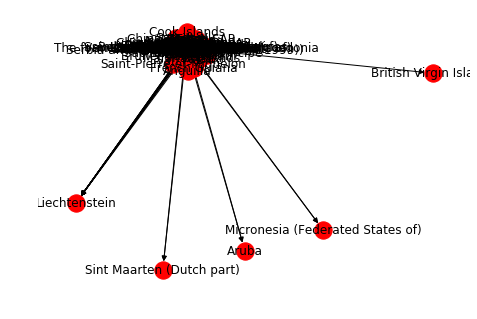

In [16]:
from_to_values = df.groupby(["origin",'destination'])['value'].sum().reset_index().sort_values("value", ascending=False)

edge_list = from_to_values[['origin', 'destination', 'value']]
edges = list(map(tuple, list(edge_list.values)))
DG = nx.DiGraph()
DG.add_weighted_edges_from(edges)

nx.draw(DG,with_labels=True)

plt.show()

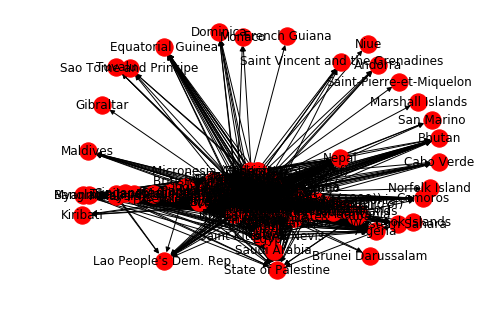

In [5]:
to_from_values = df.groupby(["destination", 'origin'])['value'].sum().reset_index().sort_values("value", ascending=False)
edge_list_out = to_from_values[["destination", 'origin', 'value']]
edges_out = list(map(tuple, list(edge_list_out.values)))
DG_out = nx.DiGraph()
DG_out.add_weighted_edges_from(edges_out)
nx.draw(DG_out, with_labels=True)
plt.show()



### Degree Centrality
- Number of neighbors. Likelihood that refugees originating anywhere in the network reaches this node
- High degree centrality: direct connction with many other nodes 
- Low degree centrality: not active, peripheral

The U.S. has the highest in-degree of centrality. 
Syria has the highest out-degree centrality.
Notice weight is not used for this calcuation. 

In [6]:
indegree_centrality = nx.algorithms.centrality.in_degree_centrality(DG)
sorted_idc = sorted(indegree_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_idc

[('United States of America', 0.8942307692307693),
 ('Germany', 0.8846153846153847),
 ('Canada', 0.875),
 ('United Kingdom', 0.7740384615384616),
 ('France', 0.6875),
 ('Sweden', 0.6682692307692308),
 ('Australia', 0.6634615384615385),
 ('Switzerland', 0.6586538461538461),
 ('Italy', 0.6442307692307693),
 ('Netherlands', 0.6346153846153847),
 ('Belgium', 0.625),
 ('Ireland', 0.5817307692307693),
 ('Norway', 0.5673076923076923),
 ('Austria', 0.5240384615384616),
 ('Finland', 0.48557692307692313),
 ('Spain', 0.4375),
 ('Brazil', 0.4278846153846154),
 ('Denmark', 0.42307692307692313),
 ('Argentina', 0.4086538461538462),
 ('Greece', 0.40384615384615385),
 ('New Zealand', 0.40384615384615385),
 ('South Africa', 0.39903846153846156),
 ('Hungary', 0.375),
 ('Ecuador', 0.3701923076923077),
 ('Mexico', 0.3605769230769231),
 ('Poland', 0.3509615384615385),
 ('Czech Rep.', 0.3509615384615385),
 ('Portugal', 0.3317307692307693),
 ('Luxembourg', 0.3269230769230769),
 ('Russian Federation', 0.317307

In [7]:
outdegree_centrality = nx.algorithms.centrality.out_degree_centrality(DG)
sorted_odc = sorted(outdegree_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_odc

[('Syrian Arab Rep.', 0.6346153846153847),
 ('Somalia', 0.5961538461538461),
 ('Iraq', 0.5817307692307693),
 ('Sudan', 0.5528846153846154),
 ('Ethiopia', 0.5528846153846154),
 ('Dem. Rep. of the Congo', 0.5528846153846154),
 ('Eritrea', 0.5240384615384616),
 ('Iran (Islamic Rep. of)', 0.514423076923077),
 ('Afghanistan', 0.48557692307692313),
 ('Nigeria', 0.46634615384615385),
 ('Cameroon', 0.46153846153846156),
 ('State of Palestine', 0.46153846153846156),
 ('Pakistan', 0.4567307692307693),
 ('Rwanda', 0.44711538461538464),
 ('Liberia', 0.4375),
 ("Côte d'Ivoire", 0.4326923076923077),
 ('Burundi', 0.42307692307692313),
 ('Sierra Leone', 0.42307692307692313),
 ('Sri Lanka', 0.4182692307692308),
 ('Congo', 0.4134615384615385),
 ('Uganda', 0.39903846153846156),
 ('Egypt', 0.38461538461538464),
 ('Yemen', 0.3701923076923077),
 ('Turkey', 0.3557692307692308),
 ('Ukraine', 0.34134615384615385),
 ('Russian Federation', 0.34134615384615385),
 ('Mali', 0.3317307692307693),
 ('Libya', 0.3317307

### Closeness centrality
- Closeness is based on the length of the average shortest path between a vertex and all vertices in the graph.
- High closeness centrality means a node is the center of the cluster it is in
- High closeness centrality: A node in the center can easily interact with all other nodes. short paths to others, minimal steps to reach others. All paths should lead to you, paths should lead from you to everywhere else. 

In our context, a high closeness centrality means refugees from other country can directly come here, or refugees from this country can go anywhere. There are many connections to all other countries. The US has the highest closeness centrality based on indegress. Syria has the highest closeness centrality based on outdegrees. 




In [8]:
closeness_centrality = nx.algorithms.centrality.closeness_centrality(DG)
sorted_cc = sorted(closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_cc

[('United States of America', 0.9005463286713287),
 ('Germany', 0.8924332986832987),
 ('Canada', 0.8844651442307692),
 ('United Kingdom', 0.8053666353971232),
 ('Sweden', 0.7420231921636415),
 ('France', 0.7392544489092997),
 ('Australia', 0.7365062911066628),
 ('Switzerland', 0.7310708203235878),
 ('Italy', 0.7178267837235229),
 ('Belgium', 0.7178267837235229),
 ('Netherlands', 0.7152353512913079),
 ('Norway', 0.6738782051282051),
 ('Austria', 0.6538620208174664),
 ('Ireland', 0.6517111589068826),
 ('Finland', 0.6210664335664335),
 ('Brazil', 0.6077306512505899),
 ('Argentina', 0.6003642191142191),
 ('Denmark', 0.5949555324555325),
 ('Ecuador', 0.5931742284661445),
 ('South Africa', 0.5844253460403903),
 ('Greece', 0.5844253460403903),
 ('Mexico', 0.579298807917229),
 ('Hungary', 0.5759307915921288),
 ('Russian Federation', 0.5709515628463756),
 ('Poland', 0.5709515628463756),
 ('Malaysia', 0.5518668309406471),
 ('Costa Rica', 0.5488093969742168),
 ('New Zealand', 0.5427950474183352),

In [9]:
out_closeness_centrality = nx.algorithms.centrality.closeness_centrality(DG_out)
sorted_cc_out = sorted(out_closeness_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_cc_out

[('Syrian Arab Rep.', 0.6764907886231416),
 ('Somalia', 0.6598557692307692),
 ('Iraq', 0.6466056533827619),
 ('Ethiopia', 0.6313914027149321),
 ('Dem. Rep. of the Congo', 0.6313914027149321),
 ('Sudan', 0.6264778509428315),
 ('Eritrea', 0.6192492603550296),
 ('Iran (Islamic Rep. of)', 0.607565312046444),
 ('Afghanistan', 0.603014261019879),
 ('State of Palestine', 0.5834022608216156),
 ('Pakistan', 0.5833507525083611),
 ('Cameroon', 0.5709390343698855),
 ('Rwanda', 0.5629538730500269),
 ("Côte d'Ivoire", 0.5609923612972393),
 ('Liberia', 0.5590444711538461),
 ('Burundi', 0.5551889920424403),
 ('Congo', 0.5551889920424403),
 ('Nigeria', 0.5532811260904044),
 ('Sierra Leone', 0.5513863277133825),
 ('Sri Lanka', 0.5495044631136781),
 ('Yemen', 0.5457790091264667),
 ('Uganda', 0.5421037296037295),
 ('Egypt', 0.5402845895715023),
 ('Turkey', 0.5296210779352226),
 ('Libya', 0.5177003462775167),
 ('Algeria', 0.516041050295858),
 ('Guinea', 0.5095088851022395),
 ('Chad', 0.5047172654931276),
 

### Betweenness Centrality
How many pairs of countries would have to go through a node in order to reach one another in the minimum number of hops? "bridge"

- high betweenness centrality: high importance, high influence

As a team, we are unsure of how to interpret betweenness centrality for refugees migration patterns, as our network is not a representation of routes over time, but flow of refugess from one country to another. For example, a refugess settles in the U.S. and may not move to Canada after that. Notice the direction did not matter for betweenness centrality. 



In [10]:
betweenness_centrality = nx.algorithms.centrality.betweenness_centrality(DG,normalized=True, weight=True)
sorted_bc = sorted(betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_bc

[('United States of America', 0.15426098413172454),
 ('Syrian Arab Rep.', 0.11035322060161257),
 ('Somalia', 0.09234381340843223),
 ('Russian Federation', 0.06320175778624043),
 ('Lebanon', 0.05983236216050806),
 ('Canada', 0.055471817770163),
 ('Uganda', 0.050600630321100286),
 ('South Africa', 0.048864914750665824),
 ('Netherlands', 0.036502855851422815),
 ('Germany', 0.03428547553234109),
 ('United Kingdom', 0.023081691648882175),
 ('Ethiopia', 0.018561681711450236),
 ('Pakistan', 0.018427757012312532),
 ('Ecuador', 0.01834629207052832),
 ('Egypt', 0.01821249927741747),
 ('Sri Lanka', 0.015541045111458766),
 ('Ukraine', 0.015366580437709755),
 ('Iraq', 0.014997748040519177),
 ('Colombia', 0.014239080319901726),
 ('Turkey', 0.013233732022585478),
 ('Nigeria', 0.012657884579189888),
 ("Côte d'Ivoire", 0.011692501680659733),
 ('Sudan', 0.011667985527650292),
 ('Cameroon', 0.011612226012999745),
 ('Dem. Rep. of the Congo', 0.01125773120310103),
 ('Congo', 0.011117240726963178),
 ('Italy

### Eigenvector centrality
- calculated based on the importance of your neighbors. 
- These are the nodes in the largest cluster of the gragh

In our context, this could mean a measure of how many refugees are going to your neighbor country or fleeing your neighboring country. Again, neighbor as in the network, not geolocation. 

In [11]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(DG, weight=True)
sorted_ec = sorted(eigenvector_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_ec

[('United States of America', 0.2958380821294183),
 ('Germany', 0.2956783608761763),
 ('Canada', 0.29302226329942593),
 ('Australia', 0.24568972368721573),
 ('Sweden', 0.2422792714719131),
 ('United Kingdom', 0.2371856367808078),
 ('Belgium', 0.2217596037977151),
 ('Netherlands', 0.22005223971773555),
 ('Switzerland', 0.2185543968721948),
 ('France', 0.1831759163447301),
 ('Italy', 0.16999327554708668),
 ('Ireland', 0.16013721462393554),
 ('Norway', 0.15956391930575375),
 ('Austria', 0.15275830769288687),
 ('Brazil', 0.12730674757958738),
 ('Argentina', 0.12459264067326563),
 ('Finland', 0.12362716618824589),
 ('Ecuador', 0.11184988370551677),
 ('South Africa', 0.10921658202995857),
 ('Mexico', 0.10218717153310031),
 ('Denmark', 0.10005785611757108),
 ('Spain', 0.09795029248578804),
 ('Greece', 0.09377446545452128),
 ('New Zealand', 0.09144994521164605),
 ('Costa Rica', 0.08919566026423406),
 ('Russian Federation', 0.08809475971841227),
 ('Hungary', 0.08434381980080687),
 ('Lebanon', 0

In [12]:
eigenvector_centrality_out = nx.eigenvector_centrality_numpy(DG_out, weight=True)
sorted_ec_out = sorted(eigenvector_centrality_out.items(), key=operator.itemgetter(1), reverse=True)
sorted_ec_out

[('Sudan', 0.2393936012005292),
 ('Somalia', 0.23221265081991585),
 ('Syrian Arab Rep.', 0.22007218401569073),
 ('Ethiopia', 0.21992006263565297),
 ('Eritrea', 0.21846686045547722),
 ('Dem. Rep. of the Congo', 0.2177658358757935),
 ('Burundi', 0.19016268800909258),
 ('Iraq', 0.1888567210172785),
 ('Rwanda', 0.18615633002333026),
 ('Uganda', 0.17394319623394008),
 ("Côte d'Ivoire", 0.1680497937850736),
 ('Cameroon', 0.16753033261624017),
 ('Chad', 0.165435471036611),
 ('Congo', 0.16439299740239327),
 ('Liberia', 0.15940265059405742),
 ('State of Palestine', 0.1564829054907798),
 ('Nigeria', 0.1470526921317239),
 ('Central African Rep.', 0.14571183583748074),
 ('Afghanistan', 0.1442364060958316),
 ('Guinea', 0.14354576894994228),
 ('Mali', 0.14257966234667702),
 ('South Sudan', 0.14074501731331737),
 ('Iran (Islamic Rep. of)', 0.1382827064040238),
 ('Sierra Leone', 0.13802001232325828),
 ('Yemen', 0.13748519553428581),
 ('Egypt', 0.1264634586406396),
 ('Togo', 0.12294610363676678),
 ('Pa

### Network constraint at node level
- to what extent a node's nearest neighbors are redundant
- Low: disconnected contacts
- High: contacts that are close or strongly tied


In our context, a low constraint means that among a country's nearest neighbors, many of them are disconnected. A high constraint means that many of a country's nearest neighbrs are connected.

The lowest is Ireland. 
*Note: nearest neighbor in the network we construct, not as in "neighboring" country based on distance*

In [13]:
nxc = nx.algorithms.structuralholes.constraint(DG,weight="weight")
sorted_nxc = sorted(nxc.items(), key=operator.itemgetter(1))
sorted_nxc

[('Ireland', 0.0888468850403163),
 ('France', 0.08897528185726966),
 ('Portugal', 0.10057762237724348),
 ('Canada', 0.10507992801745931),
 ('United States of America', 0.12931113890933796),
 ('Italy', 0.13380600296604256),
 ('Czech Rep.', 0.1541664242074358),
 ('Belgium', 0.15555498641376347),
 ('Tunisia', 0.15643736583111262),
 ('United Kingdom', 0.1605831405609331),
 ('Argentina', 0.16777925211755965),
 ('China, Hong Kong SAR', 0.17095474672201047),
 ('Rep. of Korea', 0.17259048067588145),
 ('Iceland', 0.1727049853618037),
 ('Switzerland', 0.1747860027110307),
 ('Slovakia', 0.18642411571123446),
 ('Slovenia', 0.18887451959222115),
 ('Brazil', 0.18902952878379214),
 ('Romania', 0.1929366165737911),
 ('New Zealand', 0.19485718433635818),
 ('Belarus', 0.19514312602674333),
 ('Philippines', 0.20539725502756373),
 ('Uzbekistan', 0.20966478507359754),
 ('Cuba', 0.2098185104465663),
 ('Albania', 0.21001863115403113),
 ('Paraguay', 0.21049297564358557),
 ('Norway', 0.21618154751530463),
 ('D

## Exploratory code below. For exploratory purposes only to gain intuition. 
### Do *not* use in final report



In [14]:
degree_centrality = nx.algorithms.centrality.degree_centrality(DG)
sorted_dc = sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_dc

[('United States of America', 1.0240384615384617),
 ('Germany', 0.9567307692307693),
 ('Canada', 0.9326923076923077),
 ('Syrian Arab Rep.', 0.8557692307692308),
 ('United Kingdom', 0.8365384615384616),
 ('France', 0.7403846153846154),
 ('Sweden', 0.7067307692307693),
 ('Australia', 0.7067307692307693),
 ('Italy', 0.6971153846153847),
 ('Switzerland', 0.6923076923076923),
 ('Sudan', 0.6826923076923077),
 ('Netherlands', 0.6826923076923077),
 ('Somalia', 0.6778846153846154),
 ('Iraq', 0.6730769230769231),
 ('Ethiopia', 0.6730769230769231),
 ('Belgium', 0.6634615384615385),
 ('Russian Federation', 0.6586538461538461),
 ('Dem. Rep. of the Congo', 0.6442307692307693),
 ('Egypt', 0.6442307692307693),
 ('Nigeria', 0.6442307692307693),
 ('Turkey', 0.6346153846153847),
 ('Cameroon', 0.6346153846153847),
 ('Ukraine', 0.6346153846153847),
 ('Ireland', 0.6105769230769231),
 ("Côte d'Ivoire", 0.6057692307692308),
 ('Norway', 0.5961538461538461),
 ('Pakistan', 0.5721153846153847),
 ('Liberia', 0.567

It did not make sense to use degree centrality. Notice US degree centrality is >1. According to netowrkx docs, for multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

https://networkx.github.io/documentation/stable/_modules/networkx/algorithms/centrality/degree_alg.html#degree_centrality

In [17]:
G = nx.Graph()
G.add_weighted_edges_from(edges)
degree_centrality_undirected = nx.algorithms.centrality.degree_centrality(G)
sorted_dc_undirected = sorted(degree_centrality_undirected.items(), key=operator.itemgetter(1), reverse=True)


sorted_dc_undirected

[('United States of America', 0.8942307692307693),
 ('Germany', 0.8846153846153847),
 ('Canada', 0.875),
 ('United Kingdom', 0.7884615384615385),
 ('France', 0.7211538461538461),
 ('Syrian Arab Rep.', 0.6730769230769231),
 ('Switzerland', 0.6730769230769231),
 ('Sweden', 0.6682692307692308),
 ('Australia', 0.6682692307692308),
 ('Italy', 0.6634615384615385),
 ('Netherlands', 0.6490384615384616),
 ('Belgium', 0.6442307692307693),
 ('Somalia', 0.6009615384615385),
 ('Ireland', 0.6009615384615385),
 ('Iraq', 0.5961538461538461),
 ('Ukraine', 0.576923076923077),
 ('Norway', 0.576923076923077),
 ('Sudan', 0.5721153846153847),
 ('Ethiopia', 0.5721153846153847),
 ('Dem. Rep. of the Congo', 0.5673076923076923),
 ('Russian Federation', 0.5480769230769231),
 ('Turkey', 0.5432692307692308),
 ('Nigeria', 0.5432692307692308),
 ('Austria', 0.5384615384615385),
 ('Egypt', 0.5336538461538461),
 ('Iran (Islamic Rep. of)', 0.5240384615384616),
 ('Eritrea', 0.5240384615384616),
 ('Pakistan', 0.5192307692

Using a undirected graph without weights to look at degree centrality, did not seem very different from the indegree centrality. but note that outdegree centrality had lower values. 

In [19]:
closeness_centrality_undirected = nx.algorithms.centrality.closeness_centrality(G)
sorted_cc_undirected = sorted(closeness_centrality_undirected.items(), key=operator.itemgetter(1), reverse=True)


sorted_cc_undirected

[('United States of America', 0.9043478260869565),
 ('Germany', 0.896551724137931),
 ('Canada', 0.8888888888888888),
 ('United Kingdom', 0.8188976377952756),
 ('France', 0.7819548872180451),
 ('Syrian Arab Rep.', 0.7509025270758123),
 ('Sweden', 0.7509025270758123),
 ('Switzerland', 0.7482014388489209),
 ('Australia', 0.7455197132616488),
 ('Italy', 0.7428571428571429),
 ('Belgium', 0.7375886524822695),
 ('Netherlands', 0.734982332155477),
 ('Ireland', 0.7147766323024055),
 ('Iraq', 0.7123287671232876),
 ('Somalia', 0.7123287671232876),
 ('Ukraine', 0.7027027027027027),
 ('Norway', 0.7003367003367004),
 ('Ethiopia', 0.697986577181208),
 ('Dem. Rep. of the Congo', 0.6956521739130435),
 ('Sudan', 0.6933333333333334),
 ('Turkey', 0.6864686468646864),
 ('Russian Federation', 0.6864686468646864),
 ('Egypt', 0.6797385620915033),
 ('Nigeria', 0.6797385620915033),
 ('Austria', 0.6797385620915033),
 ('Iran (Islamic Rep. of)', 0.6775244299674267),
 ('Pakistan', 0.6753246753246753),
 ('Eritrea', 

Using undirected graph to look at closeness centrality. Same as with degree centrality, seems to match with the indegree centrality, but again, outdegree centrality tended to be lower than the indegree centrality values.

In [ ]:
out_betweenness_centrality = nx.algorithms.centrality.betweenness_centrality(DG_to,normalized=True, weight=True)
sorted_bc_out = sorted(out_betweenness_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_bc_out

Looking at betweenness centrality using the out network. It doesn't seem to have changed much

In [20]:
eigenvector_centrality = nx.eigenvector_centrality_numpy(DG)
sorted_ec = sorted(eigenvector_centrality.items(), key=operator.itemgetter(1), reverse=True)

sorted_ec

[('United States of America', 0.2958380821294187),
 ('Germany', 0.2956783608761766),
 ('Canada', 0.2930222632994261),
 ('Australia', 0.24568972368721587),
 ('Sweden', 0.24227927147191322),
 ('United Kingdom', 0.23718563678080784),
 ('Belgium', 0.22175960379771528),
 ('Netherlands', 0.22005223971773558),
 ('Switzerland', 0.2185543968721949),
 ('France', 0.18317591634472996),
 ('Italy', 0.16999327554708665),
 ('Ireland', 0.16013721462393524),
 ('Norway', 0.15956391930575373),
 ('Austria', 0.15275830769288676),
 ('Brazil', 0.1273067475795875),
 ('Argentina', 0.12459264067326548),
 ('Finland', 0.12362716618824575),
 ('Ecuador', 0.11184988370551675),
 ('South Africa', 0.10921658202995849),
 ('Mexico', 0.1021871715331003),
 ('Denmark', 0.10005785611757091),
 ('Spain', 0.09795029248578802),
 ('Greece', 0.09377446545452107),
 ('New Zealand', 0.09144994521164589),
 ('Costa Rica', 0.08919566026423399),
 ('Russian Federation', 0.0880947597184123),
 ('Hungary', 0.08434381980080675),
 ('Lebanon', 0

Looking at eigenvector without weight, did not seem to have changed much

In [21]:
nx_eigen_centrality = nx.eigenvector_centrality(DG, weight=True)
sorted_ec_nx = sorted(nx_eigen_centrality.items(), key=operator.itemgetter(1), reverse=True)
sorted_ec_nx

[('United States of America', 0.29583441345396655),
 ('Germany', 0.2956748474943307),
 ('Canada', 0.29301856664623005),
 ('Australia', 0.24568584261786244),
 ('Sweden', 0.24227652193553384),
 ('United Kingdom', 0.23718353508088186),
 ('Belgium', 0.22175810054928477),
 ('Netherlands', 0.22005028921767233),
 ('Switzerland', 0.21855316731207705),
 ('France', 0.1831770316507614),
 ('Italy', 0.16999307717696222),
 ('Ireland', 0.16013860305196673),
 ('Norway', 0.15956421441063806),
 ('Austria', 0.15275955134001493),
 ('Brazil', 0.12730723205345723),
 ('Argentina', 0.12459312216555363),
 ('Finland', 0.12362956583593103),
 ('Ecuador', 0.1118490398039161),
 ('South Africa', 0.10921767982092997),
 ('Mexico', 0.10218738326159509),
 ('Denmark', 0.10006025519270423),
 ('Spain', 0.09795267341130373),
 ('Greece', 0.09377631626564738),
 ('New Zealand', 0.09145207918560254),
 ('Costa Rica', 0.08919428910914937),
 ('Russian Federation', 0.08809546682851226),
 ('Hungary', 0.0843458337901156),
 ('Lebanon'

Eigenvector centrality using implementation without numpy. Order of the countries seems the same, values slightly different

In [22]:
eigenvector_centrality_undirected = nx.eigenvector_centrality_numpy(G, weight=True)
sorted_ec_undirected = sorted(eigenvector_centrality_undirected.items(), key=operator.itemgetter(1), reverse=True)

sorted_ec_undirected

[('Germany', 0.1389012569072496),
 ('United States of America', 0.1387559594573877),
 ('Canada', 0.13814545229687397),
 ('United Kingdom', 0.12659596368812534),
 ('France', 0.12398288123828911),
 ('Syrian Arab Rep.', 0.12199363198665217),
 ('Sweden', 0.12161346259186348),
 ('Switzerland', 0.12154428047343567),
 ('Belgium', 0.12122634587974898),
 ('Australia', 0.11882605848294171),
 ('Netherlands', 0.11743683475702313),
 ('Somalia', 0.115124457911632),
 ('Ukraine', 0.11430572274503109),
 ('Sudan', 0.11372595512075238),
 ('Iraq', 0.11281483148558077),
 ('Turkey', 0.11275458627098989),
 ('Italy', 0.11245393590332513),
 ('Russian Federation', 0.1117958887312022),
 ('Ethiopia', 0.11175299415066765),
 ('Ireland', 0.11010413844233402),
 ('Egypt', 0.10982702668219711),
 ('Dem. Rep. of the Congo', 0.10978495191342605),
 ('Nigeria', 0.10962106547340006),
 ('Eritrea', 0.10513176715993798),
 ('Cameroon', 0.10444760198490594),
 ('Norway', 0.10436041895815144),
 ("Côte d'Ivoire", 0.10333845936852071

Eigenvector centrality with undirected graph. Germany is now most "central", and Syria also is more "central" now than when we used a directed graph. This changes how centrality is calculated for each node's neighbors. 

In [23]:
nxc_unweighted = nx.algorithms.structuralholes.constraint(DG)
sorted_nxc_unweighted = sorted(nxc_unweighted.items(), key=operator.itemgetter(1))

sorted_nxc_unweighted




[('United States of America', 0.025754251488971595),
 ('Italy', 0.025916220129608633),
 ('Canada', 0.026185244067378037),
 ('Germany', 0.026224802606370827),
 ('Ireland', 0.026463248755134713),
 ('France', 0.02646551792768039),
 ('Norway', 0.02659421491329619),
 ('Switzerland', 0.02688479220205908),
 ('Finland', 0.027518207052431177),
 ('Sweden', 0.027738572112027696),
 ('Austria', 0.0278997078314387),
 ('Belgium', 0.028340071703039243),
 ('United Kingdom', 0.02835374235735985),
 ('Syrian Arab Rep.', 0.028812982870160427),
 ('Netherlands', 0.028815288489185766),
 ('Spain', 0.028922814287081093),
 ('Denmark', 0.028933560178955823),
 ('Australia', 0.029037462269690156),
 ('Iran (Islamic Rep. of)', 0.02915383391022781),
 ('Somalia', 0.02967184912819704),
 ('New Zealand', 0.02985406485722305),
 ('Greece', 0.029854672632959853),
 ('Sri Lanka', 0.02998945239840884),
 ('Ukraine', 0.030065441938598635),
 ('Iraq', 0.030116331349405098),
 ('Hungary', 0.030334219129938413),
 ('Afghanistan', 0.030

For network constraint, using a weighted network suggests many of the US neighbors are not connected. 

In [25]:
nxc_undirected = nx.algorithms.structuralholes.constraint(G, weight="weight")
sorted_nxc_undirected = sorted(nxc_undirected.items(), key=operator.itemgetter(1))

sorted_nxc_undirected

[('France', 0.08983281441379125),
 ('Ireland', 0.09033858419612707),
 ('Canada', 0.09896925983094544),
 ('Portugal', 0.11263413977014908),
 ('Italy', 0.11471645933841634),
 ('United Kingdom', 0.13119314792898865),
 ('Eritrea', 0.13759576335984322),
 ('United States of America', 0.14248042976181163),
 ('Sierra Leone', 0.1430567329769392),
 ('New Zealand', 0.14587040444456226),
 ('Iceland', 0.1489551155942492),
 ('Belgium', 0.15263589107490472),
 ('Niger', 0.15294506304764122),
 ('China, Hong Kong SAR', 0.15365503484806575),
 ('Czech Rep.', 0.15497794550713573),
 ('Tunisia', 0.16418277330700928),
 ('Switzerland', 0.1692255773148114),
 ('Slovakia', 0.1727121057598052),
 ('Ecuador', 0.17318144756573026),
 ('Bolivia (Plurinational State of)', 0.1776954739586265),
 ('Guinea', 0.19220557277749079),
 ('Nigeria', 0.19271166330881156),
 ('Germany', 0.19285661864911713),
 ('Morocco', 0.19443957236171083),
 ('Norway', 0.19489760190161726),
 ('Netherlands', 0.19641944527440106),
 ('Argentina', 0.19

For network constraint, using a undirected weighted graph, France and Ireland are the top, this is more similar to the weighted directed network constraint than the unweighted directed graph. So weight plays a bigger role. It may suggest that many refugees are moving around a certain country, more "weighted" structural holes

In [27]:
out_nxc = nx.algorithms.structuralholes.constraint(DG_out,weight="weight")
sorted_nxc_out = sorted(out_nxc.items(), key=operator.itemgetter(1))
sorted_nxc_out

[('United States of America', 0.1293111389093379),
 ('Dem. Rep. of the Congo', 0.2162500922781314),
 ('Somalia', 0.28816453436282935),
 ('Serbia and Kosovo (S/RES/1244 (1999))', 0.3025279434244701),
 ('Syrian Arab Rep.', 0.3039083977734066),
 ('Germany', 0.30413496818084),
 ('Russian Federation', 0.3132808189061541),
 ('Mali', 0.32893890994985814),
 ('Sri Lanka', 0.3308462099126821),
 ('Eritrea', 0.33568096544591214),
 ('Sudan', 0.3533489369966204),
 ('Colombia', 0.3790839520812092),
 ('Egypt', 0.38535401769779376),
 ('Nigeria', 0.3873829585991358),
 ('India', 0.40154877480980156),
 ('South Sudan', 0.40413886010702044),
 ('China', 0.41177766092443047),
 ('Ethiopia', 0.4138904578066323),
 ('Central African Rep.', 0.4241477897744877),
 ('Afghanistan', 0.48896378063111756),
 ("Côte d'Ivoire", 0.5032052588194608),
 ('Nepal', 0.5104015950332198),
 ('Uganda', 0.5158635006232796),
 ('Niger', 0.5185159921298795),
 ('Liberia', 0.5237144934040964),
 ('Burundi', 0.6088578969867207),
 ('Angola', 0

Looking at network constraint using the outdegree graph. This is difficulty to interpret. Using outdegree graph, we are looking at flow of origins. In this sense, does it mean neighbors of the US have high outflow? 

In [28]:
esize = nx.effective_size(DG)
efficiency = {n: v / DG.degree(n) for n, v in esize.items()}
sorted_efficiency = sorted(efficiency.items(), key=operator.itemgetter(1), reverse=True)
sorted_efficiency

[('France', 0.7427053466014506),
 ('Canada', 0.7371134020618562),
 ('Italy', 0.7293222354340069),
 ('Germany', 0.727254362263579),
 ('United Kingdom', 0.7261692429647247),
 ('Ireland', 0.7255254510509018),
 ('Norway', 0.715010405827263),
 ('Switzerland', 0.7147472993827164),
 ('Finland', 0.7096598639455785),
 ('Luxembourg', 0.7033673469387756),
 ('New Zealand', 0.6971880907372402),
 ('Austria', 0.6962948960302459),
 ('Belgium', 0.6901911363158997),
 ('United States of America', 0.687595053891424),
 ('Sweden', 0.6863575362117634),
 ('Spain', 0.6857661013626114),
 ('Denmark', 0.6841896785875964),
 ('Australia', 0.678397889768152),
 ('Netherlands', 0.6782632414203529),
 ('Sri Lanka', 0.6766999999999996),
 ('Myanmar', 0.6744393022427911),
 ('Iran (Islamic Rep. of)', 0.672022684310019),
 ('Cuba', 0.669283768626823),
 ('State of Palestine', 0.6622178819444445),
 ('Greece', 0.6613286555002266),
 ('Viet Nam', 0.6542159763313611),
 ('Afghanistan', 0.6529827932570529),
 ('Hungary', 0.64613667764

The *effective size* of a node's ego network is based on the concept of redundancy. A country's ego network has redundancy to the extent that its contacts are connected to each other as well. The nonredundant part of a country's relationships is the effective size of its ego network. *efficiency* of a node's ego network is its effective size divided by the degree of that node. 

https://networkx.github.io/documentation/latest/_modules/networkx/algorithms/structuralholes.html#constraint

Not really able to interpret the results after looking at them